In [41]:
import numpy as np
from matplotlib import pyplot as plt

def numerov_general(func, y0, v0, h, t):
    """
    General Numerov method implementation for solving second-order ODEs of the form:
        y''(t) = f(t, y) = g(t) y(t)
    
    Parameters:
    - func: The function f(t, y), which represents the second derivative y''(t).
    - y0: Initial condition y(t0) (position).
    - v0: Initial velocity y'(t0).
    - h: Step size for the numerical method.
    - t: Array of time grid points.

    Returns:
    - y: Array of dependent variable values computed using the Numerov method.
    """
    y = np.zeros_like(t)
    y[0] = y0  # Initial condition for position
    y[1] = y0 + v0 * h + 0.5 * func(t[0], y0) * h**2  # Initial second step using Taylor expansion

    for n in range(1, len(t) - 1):
        # Evaluate the function at required points
        f_t_n_minus_1 = func(t[n - 1], y[n - 1])
        f_t_n = func(t[n], y[n])
        f_t_n_plus_1 = func(t[n + 1], y[n])  # Use current y[n] as an approximation

        # Numerov update
        y[n + 1] = (
            2 * y[n] - y[n - 1] + h**2 / 12 * (f_t_n_plus_1 + 10 * f_t_n + f_t_n_minus_1)
        )

    return y

# This implementation can now handle any function of the form f(t, y). Let me know if you'd like me to test it on other examples.


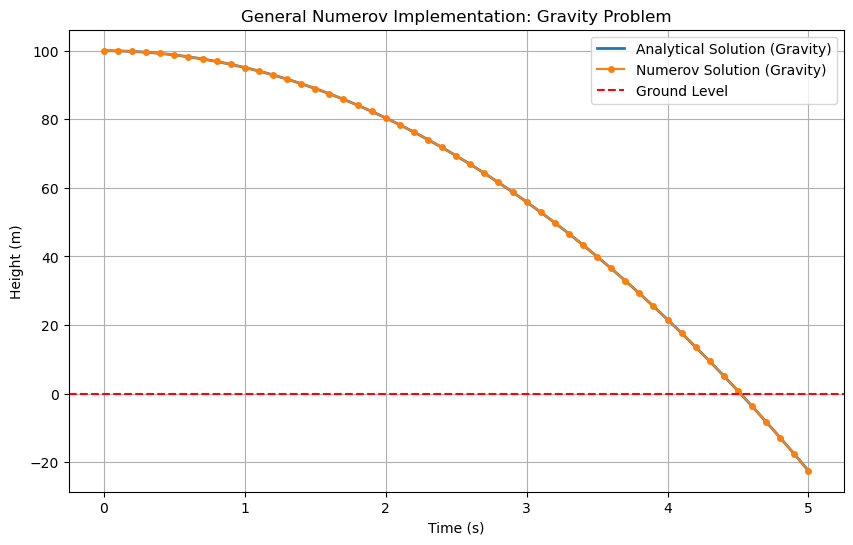

In [42]:
# Example: Gravity problem (no explicit y-dependence)
def gravity_func_general(t, y):
    return -9.8  # Constant acceleration

# Parameters
t_start, t_end = 0, 5  # Time range in seconds
h = 0.1  # Time step
t = np.arange(t_start, t_end + h, h)  # Time array
y0 = 100  # Initial height (m)
v0 = 0  # Initial velocity (m/s)

# Solve using the general Numerov method
y_numerov_gravity = numerov_general(gravity_func_general, y0, v0, h, t)

# Analytical solution for comparison
y_analytical_gravity = y0 + v0 * t + 0.5 * gravity_func_general(0, 0) * t**2

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y_analytical_gravity, label="Analytical Solution (Gravity)", linewidth=2)
plt.plot(t, y_numerov_gravity, 'o-', label="Numerov Solution (Gravity)", linewidth=1.5, markersize=4)
plt.axhline(0, color='r', linestyle='--', label="Ground Level")
plt.title("General Numerov Implementation: Gravity Problem")
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.legend()
plt.grid()
plt.show()

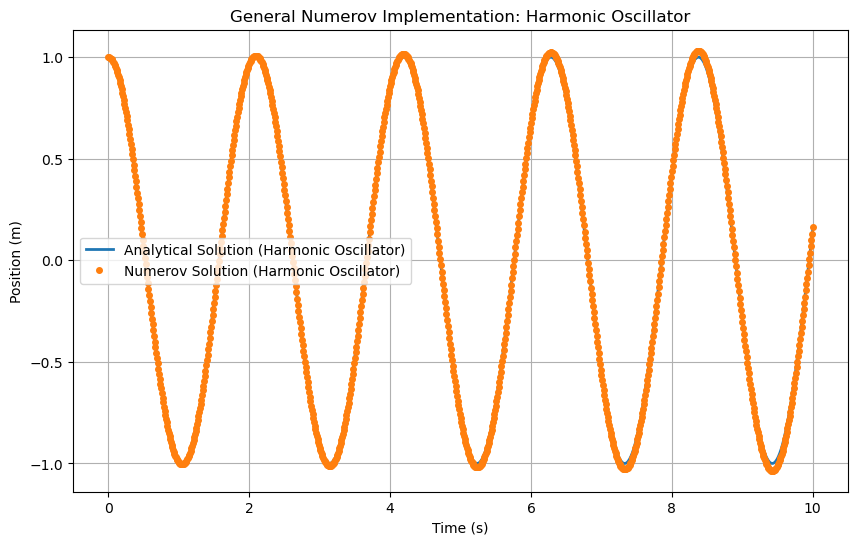

In [43]:
# Harmonic oscillator function for general Numerov
def harmonic_oscillator_func_general(t, y):
    omega = 3  # Angular frequency (rad/s)
    return -omega**2 * y  # y'' = -ω^2 * y

# Parameters for the harmonic oscillator problem
y0 = 1  # Initial position (amplitude)
v0 = 0  # Initial velocity
h = 0.01  # Smaller step size for better accuracy
t_start, t_end = 0, 10  # Time range in seconds
t = np.arange(t_start, t_end + h, h)  # Time array

# Solve the harmonic oscillator using the general Numerov method
y_numerov_harmonic = numerov_general(harmonic_oscillator_func_general, y0, v0, h, t)

# Analytical solution for comparison
omega = 3
y_analytical_harmonic = y0 * np.cos(omega * t)  # Analytical solution for simple harmonic motion

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y_analytical_harmonic, label="Analytical Solution (Harmonic Oscillator)", linewidth=2)
plt.plot(t, y_numerov_harmonic, 'o', label="Numerov Solution (Harmonic Oscillator)", linewidth=1.5, markersize=4)
plt.title("General Numerov Implementation: Harmonic Oscillator")
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.legend()
plt.grid()
plt.show()



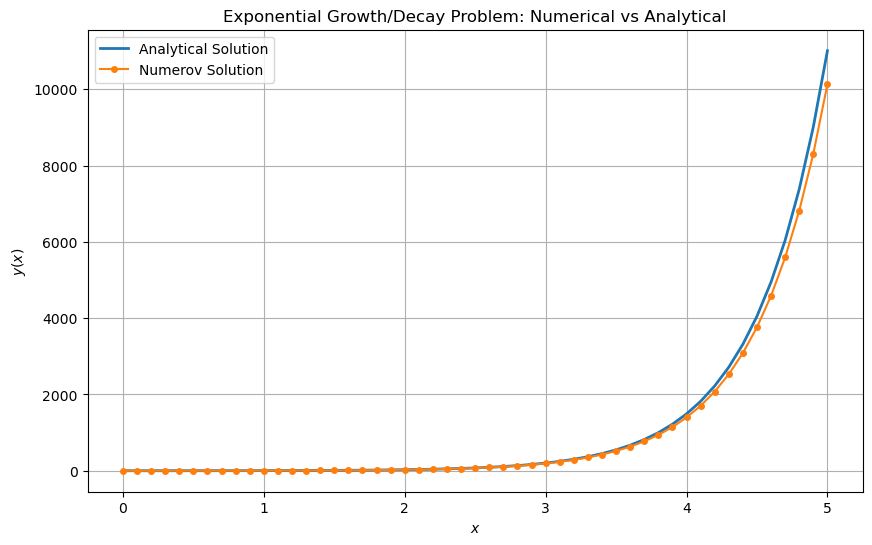

In [44]:
# Exponential growth/decay function for Numerov
def exponential_growth_decay_func(t, y):
    k = 2  # Positive constant k
    return k**2 * y  # y'' = k^2 * y

# Parameters
x_start, x_end = 0, 5  # Range for x
h = 0.1  # Step size
x = np.arange(x_start, x_end + h, h)  # x grid
y0 = 1  # Initial condition y(0)
v0 = 0  # Initial velocity dy/dx(0)

# Solve using the general Numerov method
y_numerov_exp = numerov_general(exponential_growth_decay_func, y0, v0, h, x)

# Analytical solution for comparison
k = 2
y_analytical_exp = np.cosh(k * x)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y_analytical_exp, label="Analytical Solution", linewidth=2)
plt.plot(x, y_numerov_exp, 'o-', label="Numerov Solution", linewidth=1.5, markersize=4)
plt.title("Exponential Growth/Decay Problem: Numerical vs Analytical")
plt.xlabel("$x$")
plt.ylabel("$y(x)$")
plt.legend()
plt.grid()
plt.show()
